# Dynamics of the Ramsey model with taxation

Imports and set magics:

In [351]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# local modules
#import modelproject
from modelproject import BasicRamsey
from modelproject import GovernmentRamsey


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The Ramsey model and government spending

I extend the simple Ramsey model, introduced in the lectures of the course, with government spending and taxation. In every period the govenrment spends the entire tax proceeds according to the budget restriction below.

$$
\begin{aligned}
G_t = \tau^k (1+r_t)N_{t-1} + \tau^w w_t
\end{aligned}
$$

Capital gains are taxed by the tax $\tau_k$ and the income tax on wages is $\tau_w$.

The consumers utility function is left uncahnged but the budget cosntriant is reduced by the public spending, $G_t$, reducing both the Money on hand, $M_t$ and thereby the money saved for the next period, $N_t$.

$$
\begin{aligned}
U & =\max_{\{C_{t}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}\frac{C_{t}^{1-\sigma}}{1-\sigma},\beta\in(0,1),\sigma>0\\
 & \text{s.t.}\\
 & M_{t}=(1+r_{t})N_{t-1}+w_{t}-\textcolor{red}{G_t} = \textcolor{red}{(1-\tau^k)}(1+r_{t})N_{t-1}+\textcolor{red}{(1-\tau^w)}w_{t}\\
 & N_{t}=M_{t}-C_{t}
\end{aligned}
$$

This gives rize to new equilibrium condition. The Euler is reduced by the kapital tax, making saving for the next period less profitabel. 

$$
C_{t}^{-\sigma} = \textcolor{red}{(1-\tau_{t+1}^k)}\beta(1+r_{t+1})C_{t+1}^{-\sigma}\\
$$

The capital accumulation is reduced by the government spending crowding out investments.

$$
K_{t}=(1-\delta)K_{t-1}+Y_t-C_{t}-\textcolor{red}{G_{t}}
$$






This in turn results in new steady state equilibria. 
The steady state consumption is given by:
$$
C = Y- \delta K - \textcolor{red}{G}
$$

And the implied discont factor is reduced by the following steady state condition:

$$
1=\beta (1+r^k-\delta)\textcolor{red}{(1-\tau^k)}\\
\frac{1}{(1+r^k-\delta)\textcolor{red}{(1-\tau^k)}}=\beta 
$$

The capital tax is distrotionary because it lessens the propencity to save reducing the prefered amount of capital in the economy. The wage income tax only reduces the consumption in every period by its redistribution of wealth from the consumers to the government, this result hinges on the labor supply being exogenous. 

In the model class $\textcolor{red}{GovernmentRamsey}$ I've update all the equations from the basic model. Otherwise the model is solved using the same method as the basic model, the nonlinear equation system H is now defined by the follwoing equations in every period:

$$
\begin{aligned}
H_{t}
=\left[\begin{array}{c}
C_{t}^{-\sigma}-\textcolor{red}{(1-\tau_{t+1}^k)}\beta(1+r_{t+1})C_{t+1}^{-\sigma}\\
K_{t}-[(1-\delta)K_{t-1}+Y_t-C_{t}-\textcolor{red}{G_{t}}]
\end{array}\right]
\end{aligned}
$$

# Solving the Government Ramsey model

In the nesxt sections i will solve the Government Ramsey model to see the effects of taxation both on the steady state equilibriums and the model dynamics. 

# Comparing Equilibriums

In this section i will define a government model in equilibrium and compare the steady state values given different tax rates to the basic model.

In [352]:
from modelproject import GovernmentRamsey

# I define a government model with no tax, that is identical to the basic ramsey model.
government_model_0_0 = GovernmentRamsey()
government_model_0_0.par.tau_w = 0.0
government_model_0_0.par.tau_k = 0.0
government_model_0_0.find_steady_state(KY_ss=4.0)


# I define a government model with tax rates of 20% wage and 20% capital tax.
government_model_20_20 = GovernmentRamsey()
government_model_20_20.par.tau_w = 0.02
government_model_20_20.par.tau_k = 0.0
government_model_20_20.find_steady_state(KY_ss=4.0)


# I define a government model with tax rates of 10% wage and 30% capital tax.
government_model_10_30 = GovernmentRamsey()
government_model_10_30.par.tau_w = 0.01
government_model_10_30.par.tau_k = 0.03
government_model_10_30.find_steady_state(KY_ss=4.0)

# I define a government model with tax rates of 30% wage and 10% capital tax.
government_model_30_10 = GovernmentRamsey()
government_model_30_10.par.tau_w = 0.03
government_model_30_10.par.tau_k = 0.01
government_model_30_10.find_steady_state(KY_ss=4.0)




Then i check that the erros are all zero as they should be, given that i start of the models in steady state.

In [353]:

# I check all the linear equations systems for any errors, there shoudl be none. 
errors_ss_0_0   = government_model_0_0.evaluate_path_errors()
errors_ss_20_20 = government_model_20_20.evaluate_path_errors()
errors_ss_10_30 = government_model_10_30.evaluate_path_errors()
errors_ss_30_10 = government_model_30_10.evaluate_path_errors()

#print(errors_ss)
assert np.allclose(errors_ss_0_0,0.0)
assert np.allclose(errors_ss_20_20,0.0)
assert np.allclose(errors_ss_10_30,0.0)
assert np.allclose(errors_ss_30_10,0.0)

Now well plot the paths to illustrate the differences in steady state values.

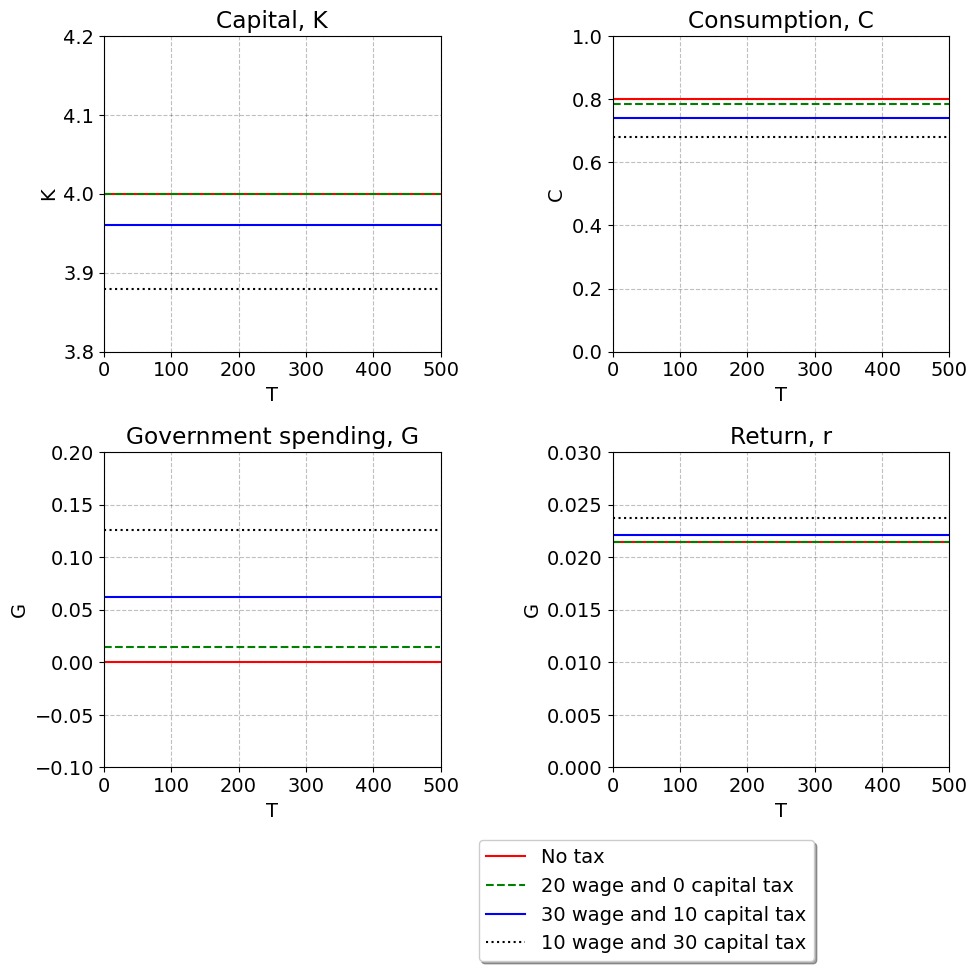

In [354]:
plt.figure(figsize=(10, 10))


# Capital
plt.subplot(2, 2, 1)  # 1 row, 2 columns, plot number 1
plt.plot(government_model_0_0.path.K_lag, 'r-', label='No tax')
plt.plot(government_model_20_20.path.K_lag, 'g--', label='20 wage and 0 capital tax')
plt.plot(government_model_30_10.path.K_lag, 'b-', label='30 wage and 10 capital tax')
plt.plot(government_model_10_30.path.K_lag, 'k:', label='10 wage and 30 capital tax')
plt.xlabel('T')
plt.ylabel('K')
plt.title('Capital, K')
plt.xlim([0, 500])
plt.ylim([3.8, 4.2])

# Consumption
plt.subplot(2, 2, 2)  # 1 row, 2 columns, plot number 2
plt.plot(government_model_0_0.path.C, 'r-', label='No tax')
plt.plot(government_model_20_20.path.C, 'g--', label='20 wage and 0 capital tax')
plt.plot(government_model_30_10.path.C, 'b-', label='30 wage and 10 capital tax')
plt.plot(government_model_10_30.path.C, 'k:', label='10 wage and 30 capital tax')
plt.xlabel('T')
plt.ylabel('C')
plt.title('Consumption, C')
plt.xlim([0, 500])
plt.ylim([0, 1])

# Government consumption
plt.subplot(2, 2, 3)  # 1 row, 2 columns, plot number 2
plt.plot(government_model_0_0.path.G, 'r-', label='No tax')
plt.plot(government_model_20_20.path.G, 'g--', label='20 wage and 0 capital tax')
plt.plot(government_model_30_10.path.G, 'b-', label='30 wage and 10 capital tax')
plt.plot(government_model_10_30.path.G, 'k:', label='10 wage and 30 capital tax')
plt.xlabel('T')
plt.ylabel('G')
plt.title('Government spending, G')
plt.xlim([0, 500])
plt.ylim([-0.1, 0.2])

# r
plt.subplot(2, 2, 4)  # 1 row, 2 columns, plot number 2
plt.plot(government_model_0_0.path.r, 'r-', label='No tax')
plt.plot(government_model_20_20.path.r, 'g--', label='20 wage and 0 capital tax')
plt.plot(government_model_30_10.path.r, 'b-', label='30 wage and 10 capital tax')
plt.plot(government_model_10_30.path.r, 'k:', label='10 wage and 30 capital tax')
plt.xlabel('T')
plt.ylabel('G')
plt.title('Return, r')
plt.xlim([0, 500])
plt.ylim([0, 0.03])

#plt.legend(loc='lower center', fontsize='small', frameon=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, -0.2),
          fancybox=True, shadow=True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

From the figure we can conclude that the size of the capital tax reduces the equilibirum capital stock, in turn driving the return from capital up and reducing equilibrium consumption. A larger wage tax also significantly reduces consumption, but the capital stock is unaffected in the steady state, this is because the wage tax isn ot distortionary. 

# Ramsey model Dynamics - Persistent technology shock

Now we will compare the dynamics of the ramsey model given different shocks.

In [355]:
# I define 3 ramsey models.
# A model with capital tax
government_model_shocks_k = GovernmentRamsey()
government_model_shocks_k.par.tau_w = 0.0
government_model_shocks_k.par.tau_k = 0.1
government_model_shocks_k.find_steady_state(KY_ss=4.0)

# A model with wage tax
government_model_shocks_w = GovernmentRamsey()
government_model_shocks_w.par.tau_w = 0.2
government_model_shocks_w.par.tau_k = 0.0
government_model_shocks_w.find_steady_state(KY_ss=3.6)

# A model with no tax
government_model_shocks_0 = GovernmentRamsey()
government_model_shocks_0.par.tau_w = 0
government_model_shocks_0.par.tau_k = 0
government_model_shocks_0.find_steady_state(KY_ss=3.6)

# I give a persistent shock to the technology begining in period 50 which subsides.
government_model_shocks_k.path.A[50:] = 0.95**np.arange(government_model_shocks_k.par.Tpath-50)*0.1*government_model_shocks_k.ss.A + government_model_shocks_k.ss.A
government_model_shocks_w.path.A[50:] = 0.95**np.arange(government_model_shocks_w.par.Tpath-50)*0.1*government_model_shocks_w.ss.A + government_model_shocks_w.ss.A
government_model_shocks_0.path.A[50:] = 0.95**np.arange(government_model_shocks_0.par.Tpath-50)*0.1*government_model_shocks_0.ss.A + government_model_shocks_0.ss.A

# I solve the three models.
government_model_shocks_k.solve() # find transition path
government_model_shocks_w.solve() # find transition path
government_model_shocks_0.solve() # find transition path





In all the models i introducce the same persistent technology shock, taking effect from period 50.

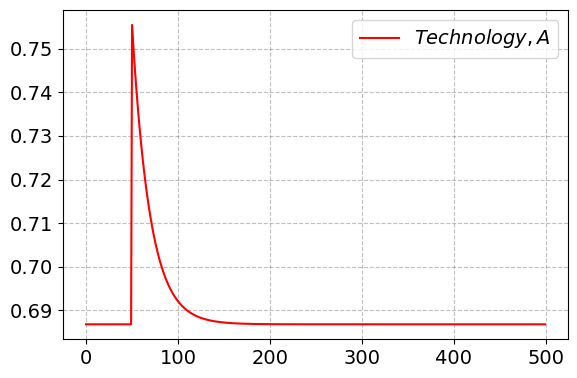

In [356]:
# plot
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(government_model_shocks_k.path.A, 'r' ,label=r'$Technology, A$')

ax.legend(frameon=True)
fig.tight_layout()

I initialised the two models without capital tax with a lower steady state capital, because i want the models to converge to the same steady state level, this makes it easier to view the difference in dynamics. In the figure below ive plotted the kapital stocks adaptation to the shock:

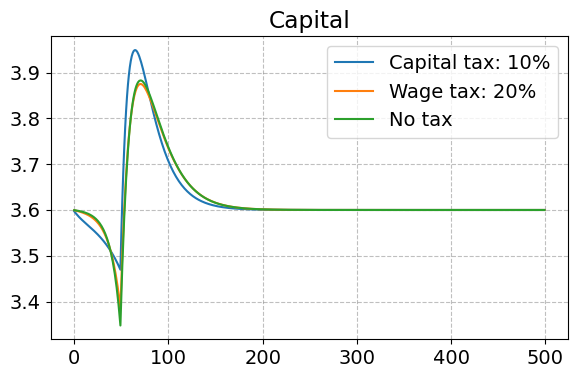

In [357]:
# plot
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(government_model_shocks_k.path.K,label=r'Capital tax: 10%')
ax.plot(government_model_shocks_w.path.K,label=r'Wage tax: 20%')
ax.plot(government_model_shocks_0.path.K,label=r'No tax')
ax.legend(frameon=True)
plt.title('Capital')
fig.tight_layout()

The consuemrs have perfect foresight, such that they will optimize the utility in all periods when setting their current consumption and savings. In anticipation to the increased technology, they will reduce their saving, reducing the capital stock, to smooth the their consumption. 

The technology shock drasticly increases the output of the economy and the capitalstock, until it subsides.

From the dynamics of the model we can clearly see the capital taxes destortionary effect on the intertemporal budget constraint. The capital tax makes the consumption shifting less effective. This contributes to the smaller fall in capital before the shock and a larger jump up i capital during the shock. 

Interestingly the capital converges faster back to the steady state when the shock subsides. This is yet againg because the capital tax reduces the return on savings, hindering consumption smoothing by reducing savings. 

In the figure below the corresponding consumption path in the three models is shown.

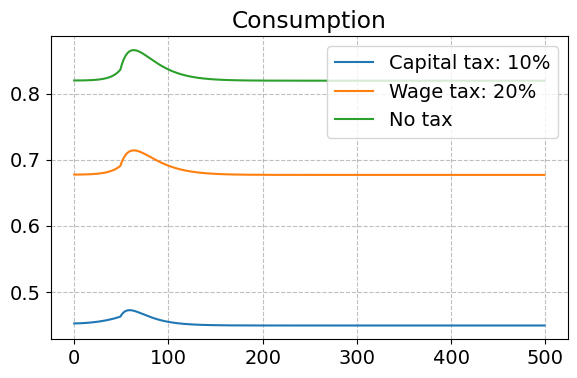

In [358]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(government_model_shocks_k.path.C,label=r'Capital tax: 10%')
ax.plot(government_model_shocks_w.path.C,label=r'Wage tax: 20%')
ax.plot(government_model_shocks_0.path.C,label=r'No tax')
ax.legend(frameon=True)
plt.title('Consumption')
fig.tight_layout()

Government spending for the three models is plotted in the figure below.

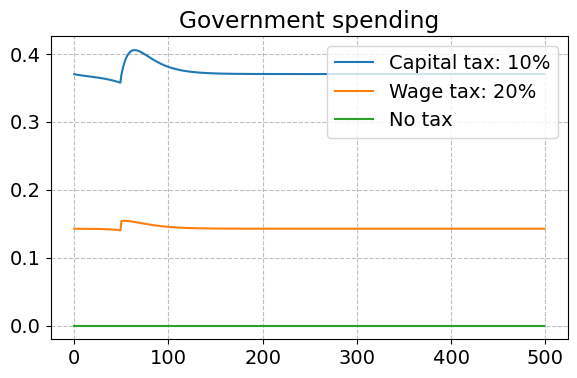

In [359]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(government_model_shocks_k.path.G,label=r'Capital tax: 10%')
ax.plot(government_model_shocks_w.path.G,label=r'Wage tax: 20%')
ax.plot(government_model_shocks_0.path.G,label=r'No tax')
ax.legend(frameon=True)
plt.title('Government spending')
fig.tight_layout()

# Conclusion

In my model project i have extended tha basic Ramsey model with government spending and both wage and capital gains taxation. 

I've shown how the wage tax, under exogenous labor, had no distortionary effect, but did move wealth from private consumption to government spending, reducing private consumption.

I've also shown that the capital gains tax does incur distortionary effects through the euler equation, reducing equilibrium capital and affecting the dynamics of the model. 